# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [4]:
# Your code here.

#import pandas library
import pandas as pd

#creates a dataframe with the columns X and Y and the values in the table above
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})
student_data.head()

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


Draw a dispersion diagram (scatter plot) for the data.

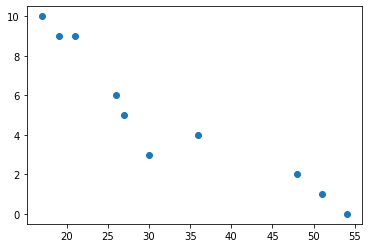

In [19]:
# Your code here.

#import the module to plot
import matplotlib.pyplot as plt

#define the variables to plot:
x = student_data[['X']]
y = student_data['Y']

#creates a scatter plot
plt.scatter(x,y)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
younger the person, higher is the number of tardies. When the age increases the number of tardies decrease.
It shows that younger tend to late to class when compared with older people 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [9]:
# Your response here.
#correlation:
student_data.corr()
# the negative correlation have a high value almost -1 that is perfect correlation, it shows that when
#one variable increases the other one decreases, when the age (X) increases the tardies (Y) decreases.


,X,Y
X,1.000000,-0.939163
Y,-0.939163,1.000000


In [10]:
#covariance:
student_data.cov()
# the covariance describes the relationship between two variables, when the covariance is negative 
#the variables change in different direction like in this situation (-45.56) 

,X,Y
X,187.655556,-45.566667
Y,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [12]:
student_data.dtypes

X    int64
Y    int64
dtype: object

In [20]:
# Your response here.
#my outcome variable is tardies (Y), i want to predict based on the age how manny times a student is late for class
# i'm using SIMPLE LINEAR REGRESSION (UNIVARIATE ANALYSIS)


from sklearn import linear_model

# we first create the model. This just tells python to be ready to use a linear model, it does not actually compute anything yet
model = linear_model.LinearRegression()

# we now "fit" (a.k.a. "train") the model in our data
# linear regression picks the line (i.e. the intercept and the gradient) that best "fits" our data
# we will get to the meaning of "fitting the data" in a second

result = model.fit(x,y)
display(result.intercept_)
display(result.coef_) # coefficients is an array because later we will see we can have more than one dimension for our gradient<

12.888803363135771

array([-0.24282077])

Plot your regression model on your scatter plot.

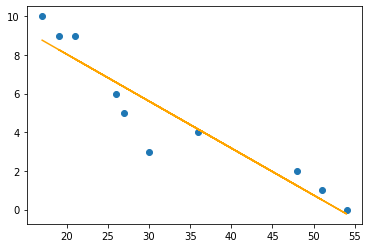

In [21]:
# Your code here.
regression_line = result.intercept_+result.coef_[0]*x
plt.plot(x,regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
#There is a good correlation and is negative, as the age increases the tardies decreases

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [28]:
# Import any libraries you may need & the data
import pandas as pd

vehicles_df = pd.read_csv('vehicles.csv ')
vehicles_df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [34]:
# Your response here. 
#X =  Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year
#Y = 'CO2 Emission Grams/Mile'

#create a dataframe with only the columns of interest
vehicles_subdf = vehicles_df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']]

#shows the correlation between the variables
vehicles_subdf.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [ ]:
#based on the correlation table, Fuel Barrels/Year have the strongest correlation with CO2 Emission Grams/Mile and Year have
#the lowest correlation. 

#The most important in determining CO2 emissions is the Fuel Barrels/Year

# Year provides the least amount of helpful information for determining CO2 emissions



Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

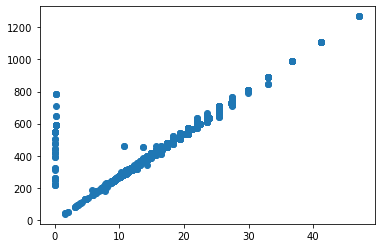

In [41]:
# Your response here. 
 
x = vehicles_subdf[['Fuel Barrels/Year']]
y = vehicles_subdf['CO2 Emission Grams/Mile']
plt.scatter(x,y)

In [42]:
#using linear regression
model = linear_model.LinearRegression()

#we now "fit" (a.k.a. "train") the model in our data
# linear regression picks the line (i.e. the intercept and the gradient) that best "fits"our data
result = model.fit(x,y)
display(result.intercept_)
display(result.coef_)

12.486520830749896

array([26.2836254])

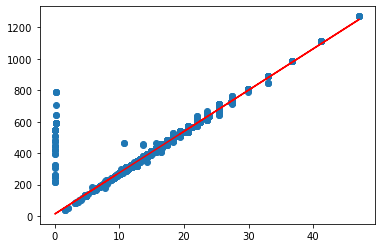

In [43]:
regression_line = result.intercept_+result.coef_[0]*x
plt.plot(x,regression_line, c ='red')
plt.scatter(x,y)
plt.show()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [52]:
# Your response here. 

# implement linear regression in Python relatively easily by using the package statsmodels
import statsmodels.api as sm

x = vehicles_subdf['Fuel Barrels/Year']
y = vehicles_subdf['CO2 Emission Grams/Mile']

# How to obtain the regression model based on ordinary least squares is an instance of the class statsmodels.regression.linear_model.OLS
model = sm.OLS(y, x)


#calling .fit(), you obtain the variable results, which is an instance of the class statsmodels.regression.linear_model.RegressionResultsWrapper.
#This object holds a lot of information about the regression model
result = model.fit()

#shows the summary Details and statistics
result.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.998
Model:                                 OLS   Adj. R-squared (uncentered):              0.998
Method:                      Least Squares   F-statistic:                          2.164e+07
Date:                     Sat, 26 Jun 2021   Prob (F-statistic):                        0.00
Time:                             13:32:12   Log-Likelihood:                     -1.5864e+05
No. Observations:                    35952   AIC:                                  3.173e+05
Df Residuals:                        35951   BIC:                                  3.173e+05
Df Model:                                1                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fuel Barrels/Year    26.9498      0.006   4651.565      0.000      26.938      26.961
==============================================================================
Omnibus:                    89555.105   Durbin-Watson:                   0.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1022572329.320
Skew:                          27.472   Prob(JB):                         0.00
Kurtosis:                     827.382   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [56]:
# Your code here.
party_df = pd.DataFrame({'X':[1,3,4,6,8,9,11,14], 'Y':[1,2,4,4,5,7,8,13]})
party_df.head()

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

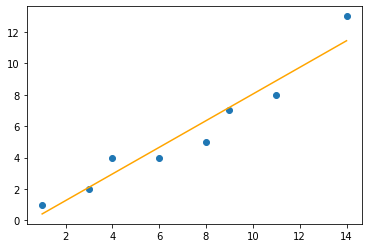

In [59]:
# Your code here.
x = party_df[['X']]
y = party_df['Y']



from sklearn import linear_model

# create the linear model
model = linear_model.LinearRegression()

#"fit" (a.k.a. "train") the model in our data
result = model.fit(x,y)

#display(result.intercept_)
#display(result.coef_)
regression_line = result.intercept_+result.coef_[0]*x
plt.plot(x,regression_line, c = 'orange')
plt.scatter(x,y)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [66]:
# Your response here. 
print('the variables have a high correlation, the correlation is ' ,party_df['X'].corr(party_df['Y']) )


the variables have a high correlation, the correlation is  0.9652303546573691
LinearRegression()


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

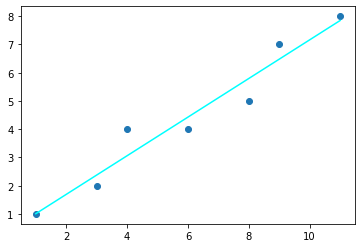

In [73]:
# Your response here. 
party_df_noOutliers = pd.DataFrame({'X':[1,3,4,6,8,9,11], 'Y':[1,2,4,4,5,7,8]})
x = party_df_noOutliers[['X']]
y = party_df_noOutliers['Y']

model = linear_model.LinearRegression()
result = model.fit(x,y)
regression_line = result.intercept_+result.coef_[0]*x
plt.plot(x,regression_line, c = 'cyan')
plt.scatter(x,y)

In [87]:
# implement linear regression in Python relatively easily by using the package statsmodels
import statsmodels.api as sm

x = party_df_noOutliers['X']
y = party_df_noOutliers['Y']

# How to obtain the regression model based on ordinary least squares is an instance of the class statsmodels.regression.linear_model.OLS
model = sm.OLS(y, x)


#calling .fit(), you obtain the variable results, which is an instance of the class statsmodels.regression.linear_model.RegressionResultsWrapper.
#This object holds a lot of information about the regression model
result = model.fit()

#shows the summary Details and statistics
result.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              449.6
Date:                Sat, 26 Jun 2021   Prob (F-statistic):                    7.18e-07
Time:                        15:56:12   Log-Likelihood:                         -6.0445
No. Observations:                   7   AIC:                                      14.09
Df Residuals:                       6   BIC:                                      14.03
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              0.7256      0.034     21.203      0.000       0.642       0.809
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.588
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.199
Skew:                           0.282   Prob(JB):                        0.905
Kurtosis:                       2.395   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [84]:
# Your response here. 
print('The correlation with the outlier is: ',party_df['X'].corr(party_df['Y']),'\nThe correlation without the outlier is: ',party_df_noOutliers['X'].corr( party_df_noOutliers['Y']))

The correlation with the outlier is:  0.9652303546573691 
The correlation without the outlier is:  0.9712781168250858


In [85]:
print('Without the outlier the correlations is better')

Without the outlier the correlations is better
